In [38]:
using Pkg
using Plots
# Pkg.add("LaTeXStrings")
using LaTeXStrings

# Baby SIR

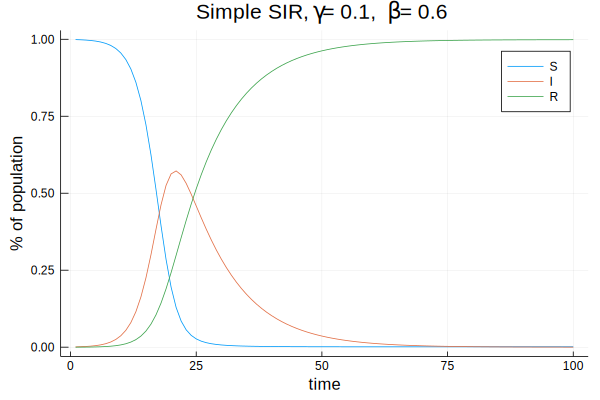

In [39]:
# Length of run
n = 100

# Initialize population
S = zeros(n)
I = zeros(n)
R = zeros(n)

I[1] = 0.001
S[1] = 1 - I[1]
R[1] = 0


# time index
time = collect(1:n)

# infection parameters
beta = 0.6
gamma = 0.1

# Run simple deterministic
for i in 1:n-1
    S[i+1] = S[i] - beta*S[i]*I[i]
    I[i+1] = I[i] + beta*S[i]*I[i] - gamma*I[i]
    R[i+1] = R[i] + gamma*I[i]
end

# Plot results
plot(time, S, label = "S", xlabel = "time", ylabel = "% of population", 
    title = string("Simple SIR, \\gamma = ", gamma, ", \\beta = ", beta))
plot!(I, label = "I")
plot!(R, label = "R")

# Adding $L$ and $\theta$

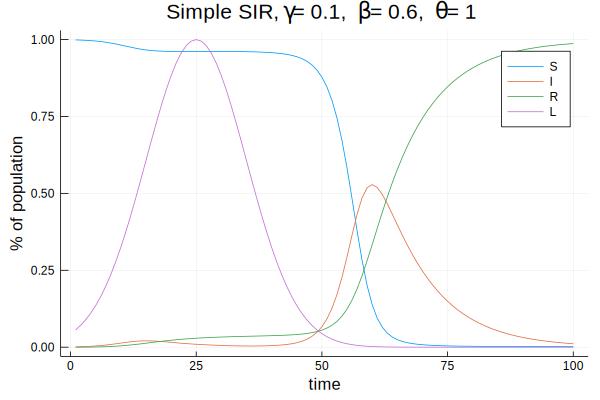

In [60]:
# Length of run
n = 100

# Initialize population
S = zeros(n)
I = zeros(n)
R = zeros(n)
L = zeros(n)

I[1] = 0.001
S[1] = 1 - I[1]
R[1] = 0

# Control L
for i in 1:n
    L[i] = max(exp(-1/(2*100)*(25-i)^2), 0)
end


# time index
time = collect(1:n)

# infection parameters
beta = 0.6
gamma = 0.1
theta = 1

# Run simple deterministic
for i in 1:n-1
    S[i+1] = S[i] - beta*S[i]*I[i]*(1-theta*L[i])^2
    I[i+1] = I[i] + beta*S[i]*I[i]*(1-theta*L[i])^2 - gamma*I[i]
    R[i+1] = R[i] + gamma*I[i]
end

# Plot results
plot(time, S, label = "S", xlabel = "time", ylabel = "% of population", 
    title = string("Simple SIR, \\gamma = ", gamma, ", \\beta = ", beta, ", \\theta = ", theta))
plot!(I, label = "I")
plot!(R, label = "R")
plot!(L, label = "L")